## GBDT を用いた分類器の実装

- データセット: Boston house prices dataset
- 手法: GBDT
- モジュール: LightGBM

### モジュールのインポート

In [36]:

import numpy as np
import sklearn.datasets
import sklearn.metrics
import lightgbm as lgb
from matplotlib import pyplot as plt


### データセットのロード
- 特徴量ベクトル: 13次元
- データ数: 506

In [3]:
dataset = sklearn.datasets.load_boston()

### 学習データとテストデータの準備
ランダムに406個を学習データ、100個をテストデータとして用いる。

In [4]:
P = 406
ids = np.arange(len(dataset["target"]))
np.random.shuffle(ids)
train_ids = ids[:P]
test_ids = ids[P:]

In [5]:
test_ids

array([437, 456, 230, 422,  48, 275, 462, 319, 350, 167,  87, 261, 136,
       240, 254, 223, 117, 286, 315, 182, 124, 360, 151, 341, 336, 243,
        20, 122, 164, 204, 376, 115, 452, 334, 386,  12,  11, 160, 383,
       143, 431, 174, 105, 371, 141, 129, 110, 172, 320, 397, 433, 113,
       271, 119,  46,   8, 267, 237, 134, 448, 493,  35, 224, 239, 378,
       405, 131, 470, 460,  97, 187, 321,  95, 217, 445,  91, 219,  17,
       395, 111, 425, 197, 476, 235, 325, 259, 127,  14, 145, 419, 227,
       317, 492, 121,  47, 306, 173, 250, 465,   5])

### 学習器のロード

In [24]:
classifier = lgb.LGBMRegressor()


In [25]:
classifier

LGBMRegressor()

In [26]:
classifier.fit(dataset["data"][train_ids], dataset["target"][train_ids])


LGBMRegressor()

In [27]:
R = classifier.predict(dataset["data"][test_ids])
R


array([ 9.13486768, 17.24445444, 21.90787785, 20.2647225 , 19.02989022,
       32.6001358 , 20.17909873, 21.97708611, 22.34913973, 19.60321768,
       24.55283283, 43.96094701, 17.57369879, 27.16813541, 22.12241194,
       24.53472583, 20.42711273, 22.99684235, 17.77287624, 40.96924304,
       19.07446739, 26.68877954, 19.4675758 , 31.6181056 , 19.22660701,
       25.43888349, 13.12596526, 19.71282054, 20.35009824, 46.30980534,
       10.99728122, 18.41629301, 17.15333453, 21.39204749,  6.60728613,
       20.41536772, 20.464083  , 29.33598434, 11.21398961, 14.22926063,
       22.57533788, 25.20355204, 18.28415889, 33.76953968, 16.71124622,
       17.21067172, 22.34557048, 20.93827977, 24.15764612, 13.23412951,
       15.2206215 , 20.48483022, 26.57472185, 20.26988417, 21.09891176,
       16.90350379, 41.90851855, 32.40044501, 16.18006207, 14.64375686,
       18.45094799, 23.26075244, 43.48855426, 26.15455213,  6.97363594,
        8.08962831, 21.25836104, 17.9877619 , 15.82060932, 43.18

### 評価
学習結果と実際のデータを比較

In [28]:
print("Predict: ", end = "")
print(R)
print("Actual:  ", end = "")
print(dataset["target"][test_ids])

Predict: [ 9.13486768 17.24445444 21.90787785 20.2647225  19.02989022 32.6001358
 20.17909873 21.97708611 22.34913973 19.60321768 24.55283283 43.96094701
 17.57369879 27.16813541 22.12241194 24.53472583 20.42711273 22.99684235
 17.77287624 40.96924304 19.07446739 26.68877954 19.4675758  31.6181056
 19.22660701 25.43888349 13.12596526 19.71282054 20.35009824 46.30980534
 10.99728122 18.41629301 17.15333453 21.39204749  6.60728613 20.41536772
 20.464083   29.33598434 11.21398961 14.22926063 22.57533788 25.20355204
 18.28415889 33.76953968 16.71124622 17.21067172 22.34557048 20.93827977
 24.15764612 13.23412951 15.2206215  20.48483022 26.57472185 20.26988417
 21.09891176 16.90350379 41.90851855 32.40044501 16.18006207 14.64375686
 18.45094799 23.26075244 43.48855426 26.15455213  6.97363594  8.08962831
 21.25836104 17.9877619  15.82060932 43.18556274 27.11916376 24.18602364
 25.62600009 22.84137812 10.12419301 22.2727027  22.86609572 17.470835
 12.11840758 22.30487335  7.79732197 32.246605

### R2スコアの導出

In [31]:
R2 = classifier.score(dataset["data"][train_ids], dataset["target"][train_ids])
print("R2 score: ", R2)

R2 score:  0.9770718570851348


### MAE

In [33]:
MAE = sklearn.metrics.mean_absolute_error(R, dataset["target"][test_ids])
print("MAE: ", MAE)

MAE:  2.141375371420869


### MSE

In [34]:
MSE = sklearn.metrics.mean_squared_error(R, dataset["target"][test_ids])
print("MSE: ", MSE)

MSE:  9.999214673368321


### MAPE

In [35]:
MAPE = sklearn.metrics.mean_absolute_percentage_error(R, dataset["target"][test_ids])
print("MAPE: ", MAPE)

MAPE:  0.10941830002132363


### WAPE

In [ ]:
WAPE = sklearn.metrics.(R, dataset["target"][test_ids])
print("WAPE: ", WAPE)

## yyplot

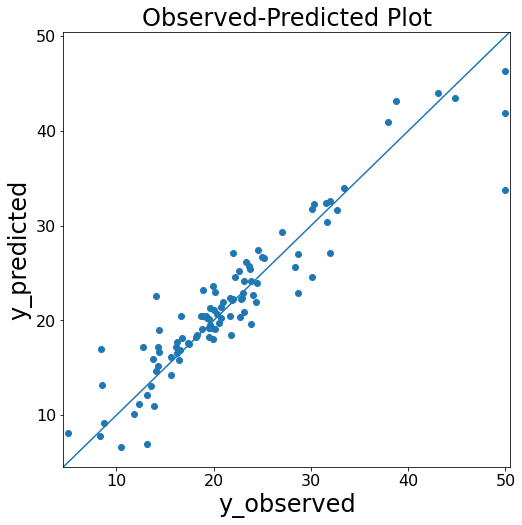

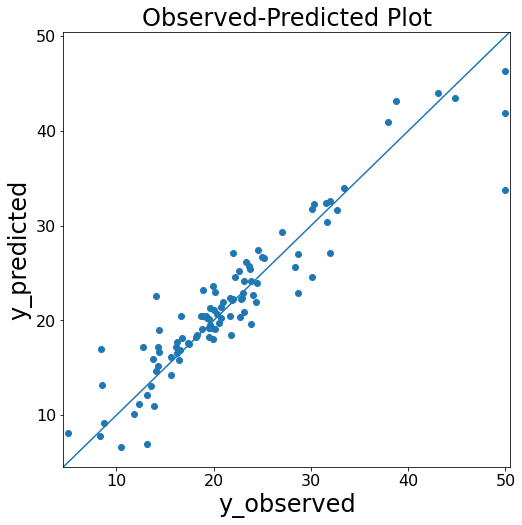

In [38]:
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

yyplot(dataset["target"][test_ids], R)
